In [1]:
%%capture
# Instala
%pip install sidetable

In [2]:
# Importando as bibliotecas nescessárias
import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer, scale

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer

In [3]:
# Atribuíndo o arquivo csv a variavel df
df = pd.read_csv('data.csv', encoding='latin1')
# Printando o tamanho do df
print(df.shape)
# Verificando as 5 primeiras linhas do df
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **Data Understanding**

In [4]:
# Estatisticas descritivas
display(df.describe())
print('\n')
# Verficando os dados
print(df.info())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
# Verificação de dados faltantes
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
StockCode,0,541909,0.000000
InvoiceNo,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [6]:
# Dados duplicados
df.duplicated().sum()

np.int64(5268)

In [7]:
# Conta a frequência relativa dos países e transforma em DataFrame
df_country_freq = df['Country'].value_counts(normalize=True, ascending=True).reset_index()
df_country_freq.columns = ['Country', 'Proporção']

# Cria o gráfico de barras horizontal
fig = px.bar(df_country_freq, x='Proporção', y='Country', orientation='h',
    title="Distribuição dos países",
    template='plotly_dark'
)

# Personalizando o layout
fig.update_layout(title_x=0.5)
fig.show()

# Cria uma tabela de frequências para a coluna 'Country'
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


<Axes: >

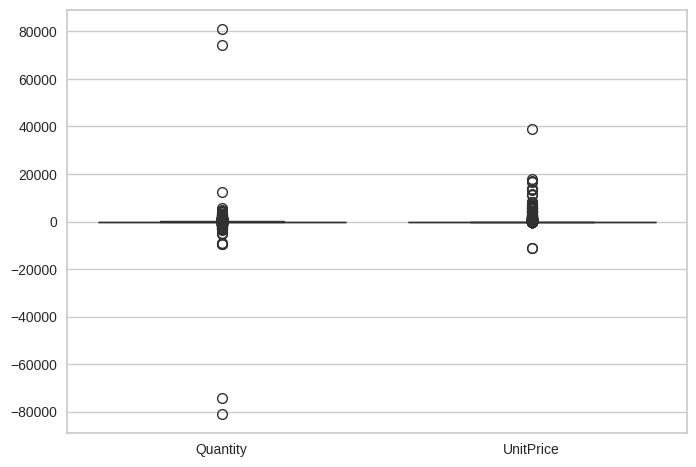

In [8]:
# Verificação de Outliers
sns.boxplot(df[['Quantity', 'UnitPrice']])

## **Data Preparation**

In [9]:
# Dropando linhas vazias que contém dados ausentes
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [10]:
# Retirando todos os 'UnitPrice' que tenha valores iguais que 0
df = df[df['UnitPrice'] > 0]

# Retirando todos os 'Quantity' que tenha valores menores que 0
df = df[df['Quantity'] > 0]

# Verificando os valores minimos das colunas 'Quantity' e 'UnitPrice'
print(f"Valor mínimo UnitPrice: {df['UnitPrice'].min()}")
print(f"Valor mínimo Quantity: {df['Quantity'].min()}")


Valor mínimo UnitPrice: 0.001
Valor mínimo Quantity: 1


In [11]:
# Transformando a coluna InvoiceDate no tipo datetime
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

# Transformando a coluna CustomerID no tipo int
df['CustomerID'] = df['CustomerID'].astype(int)

# Transformando a coluna Country no tipo category
df['Country'] = df['Country'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.3+ MB


In [12]:
features = ['Quantity', 'UnitPrice']

# Função para suavizar os outliers
def suaviza_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.35)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    df[column] = df[column].clip(upper=limite_superior)
    return df
# Criando uma cópia do df
df_suavizado = df.copy()
# Loop para adicionar novos valores no dataframe suavizado
for col in features:
  df_suavizado = suaviza_outliers_iqr(df, col)

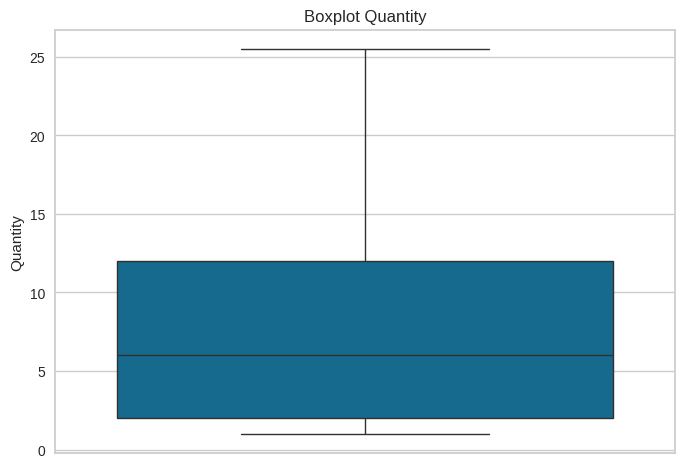

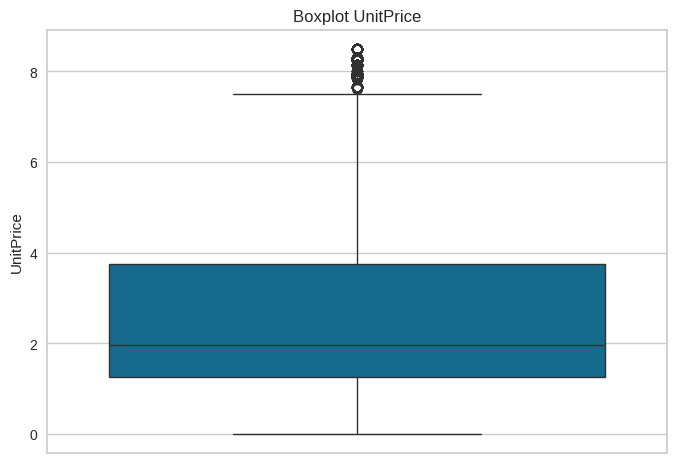

In [13]:
# Verificando se ainda existem outliers
for var in features:
  sns.boxplot(df_suavizado[var])
  plt.title(f'Boxplot {var}')
  plt.show()

In [14]:
# Verificando as estatísticas descritivas
df_suavizado.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,8.295103,2011-07-10 19:13:07.771892480,2.675493,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,25.500000,2011-12-09 12:50:00,8.500000,18287.000000
std,7.889571,NaN,2.283680,1713.539549


In [15]:
# Criando uma nova coluna do valor total da compra
df_suavizado['TotalPrice'] = df_suavizado['UnitPrice'] * df_suavizado['Quantity']
df_suavizado.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
# Calculando a data inicial e data final do dataframe
df_suavizado.InvoiceDate.agg(['min','max'])

,InvoiceDate
min,2010-12-01 08:26:00
max,2011-12-09 12:50:00


In [17]:
# Calculando o RFM e transfomrando em df
df_rfm = (
  df_suavizado.groupby('CustomerID') #Agrupando pelo CustomerID
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp('2011-12-31') - x.max()).days), # Calcula a diferença em dias do dia 31/12/2011 da última data de compra
      F = ('InvoiceNo', 'nunique'), # Calcula a frequência com base nas transações únicas
      M = ('TotalPrice', 'mean') # Calcula a média do total gasto
  )
)

df_rfm

,R,F,M
CustomerID,,,
12346,346,1,26.520000
12347,23,7,21.351071
12348,96,4,17.559839
12349,39,1,18.669863
12350,331,1,17.817647
...,...,...,...
18280,298,1,17.770000
18281,201,1,9.131429
18282,28,2,12.877083


<Axes: >

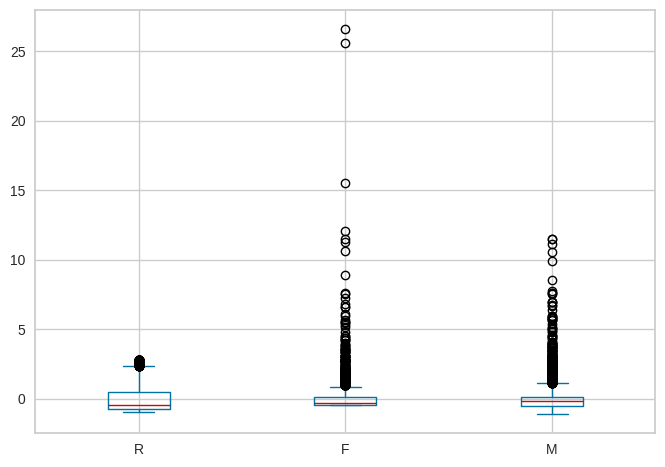

In [18]:
# Aplicando a mesma escala para melhor visualização dos três boxplots
df_rfm.apply(scale).plot.box()

In [19]:
# Aplica o método clip para limitar valores extremos acima do percentil 95 em cada coluna do DataFrame RFM
df_rfm = df_rfm.apply(lambda x: x.clip(upper=x.quantile(0.95)))
df_rfm.describe()

,R,F,M
count,4338.000000,4338.000000,4338.000000
mean,111.272937,3.607653,17.834861
std,95.545467,3.358326,10.278171
min,21.000000,1.000000,2.115000
25%,38.000000,1.000000,10.999918
50%,71.000000,2.000000,16.506453
75%,162.750000,5.000000,21.094614
max,332.000000,13.000000,45.434241


In [20]:
# Método para padronizar as variáveis numéricas
scaler = PowerTransformer()

# Cria um novo dataframe padronizado
df_rfm_scaled = pd.DataFrame(
    scaler.fit_transform(df_rfm),  # Padroniza os dados RFM com o objeto scaler
    index=df_rfm.index,            # Mantém os mesmos índices do df_rfm
    columns=df_rfm.columns         # Mantém os mesmos nomes da colunas do df_rfm
)
df_rfm_scaled

,R,F,M
CustomerID,,,
12346,1.595602,-1.159361,0.932698
12347,-1.563861,1.245963,0.521414
12348,0.324062,0.669951,0.172450
12349,-0.809808,-1.159361,0.279684
12350,1.592877,-1.159361,0.197769
...,...,...,...
18280,1.496964,-1.159361,0.193109
18281,1.118760,-1.159361,-0.853066
18282,-1.275243,-0.207385,-0.340442


## **Modeling**

### **Kmeans**

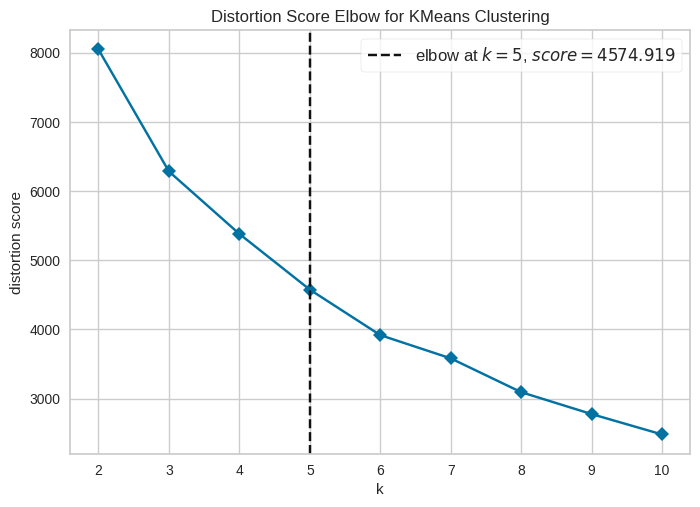

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [21]:
# Plotando o gráfico do Cotovelo pra descobrir o K
kelbow_visualizer(KMeans(), df_rfm_scaled, k=10, timings=False)

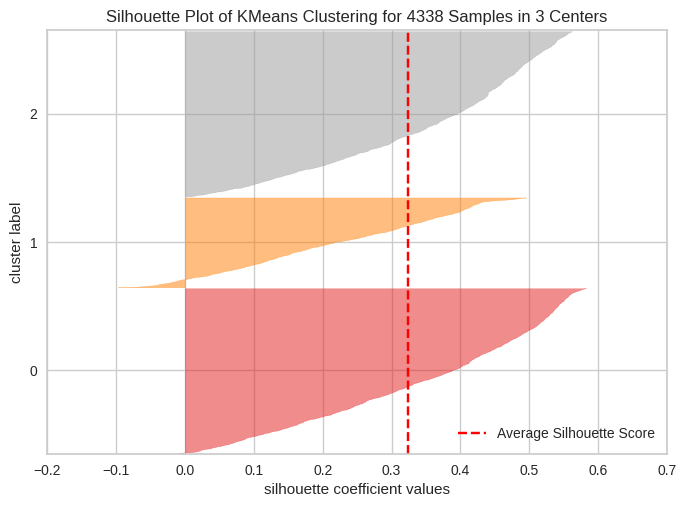

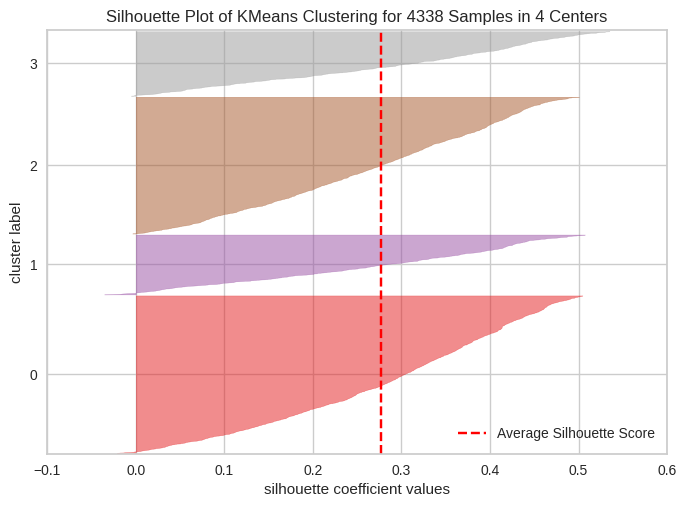

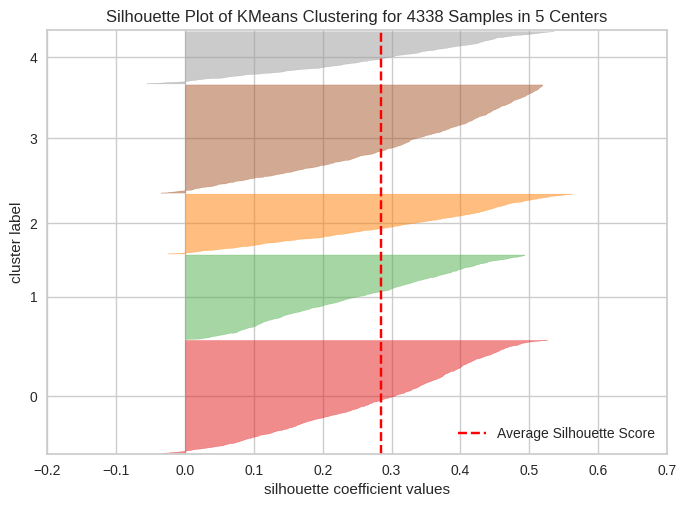

In [22]:
# Criando um cópida do dataframe
X = df_rfm_scaled.copy()

# Gera os gráficos de Silhouette para avaliar a qualidade da clusterização
for cluster in range(3,6): # Mostra o gráfico de 3 até 5 clusters
  silhouette_visualizer(
      KMeans(n_clusters=cluster),  # Algoritmo KMeans configurado para os clusters
      X                      # Conjunto de dados a ser analisado
)

In [23]:
# Métricas para avaliação do modelo Kmeans
kmeans_metricas = silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Lista vazia
kmeans_metricas_resultados = []
# Copiando o dataframe
X = df_rfm_scaled.copy()
for k in range(2,11): # Loop para treinar o Kmeans com k de 2 até o 10
  model_kmeans = KMeans(n_clusters=k, random_state=42) # Modelo Kmeans recebe o valor do range com a reprodutibilidade do random_state
  labels =  model_kmeans.fit_predict(X) # Resultados do modelo treinado com o dataframe
  kmeans_resultados = {'k': k} # Dicionário com os valores do K
  for metricas in kmeans_metricas: # Loop para os resultados das métricas
    kmeans_resultados[metricas.__name__] = metricas(X, labels) #  Nome da métrica como chave
  kmeans_metricas_resultados.append(kmeans_resultados) # Adiciona o resultado dentro da lista

# Criando um novo dataframe com o resultados das métricas de avaliação do modelo Kmeans
pd.DataFrame(kmeans_metricas_resultados).set_index('k').style.background_gradient()


,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.344131,1.165866,2675.187027
3,0.326042,1.127775,2320.036747
4,0.275745,1.249487,2033.842946
5,0.284904,1.127966,1998.214656
6,0.302295,1.040468,2012.456772
7,0.292280,1.038867,1901.900288
8,0.307055,0.977691,1983.959614
9,0.315280,0.988672,2044.465257
10,0.310020,1.022676,1933.618857


In [36]:
# Iniciando o modelo Kmeans com 5 clusters com semente para reprodutibilidade
kmeans = KMeans(5, random_state=42)

# Aplicando o modelo
kmeans_labels = kmeans.fit_predict(df_rfm_scaled)

# Plotando o gráfico para a visualização dos clusters
px.scatter_3d (df_rfm, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

### **Hierarchical Clustering**

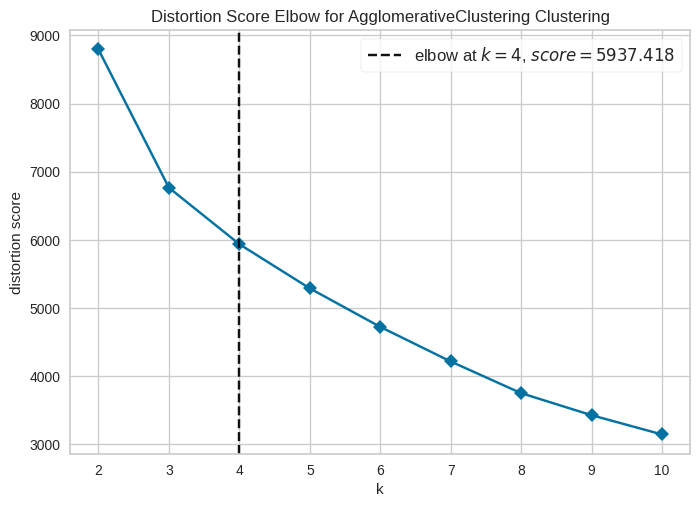

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [25]:
# Plotando gráfico do Cotovelo
kelbow_visualizer(AgglomerativeClustering(), df_rfm_scaled, k=10, timings=False)

In [26]:
# Métricas para avaliação do modelo Clusterização Hierarquica
hieraquia_metricas = silhouette_score, davies_bouldin_score, calinski_harabasz_score
hierarquia_metricas_resultados = [] # Lista vazia
X = df_rfm_scaled.copy() # Copiando o dataframe

for k in range(2,11): # Loop para treinar o modelo com k de 2 até o 10
  model_hierarquia = AgglomerativeClustering(n_clusters=k) # Modelo recebe o valor do range
  labels =  model_hierarquia.fit_predict(X) # Resultados do modelo treinado com o dataframe
  hierarquia_resultados = {'k': k} # Dicionário com os valores do K
  for metricas in hieraquia_metricas: # Loop para os resultados das métricas
    hierarquia_resultados[metricas.__name__] = metricas(X, labels) #  Nome da métrica como chave
  hierarquia_metricas_resultados.append(hierarquia_resultados) # Adiciona o resultado dentro da lista

# Criando um novo dataframe com o resultados das métricas de avaliação do modelo
pd.DataFrame(hierarquia_metricas_resultados).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.300817,1.302636,2081.161880
3,0.298591,1.174232,2001.981934
4,0.258290,1.325449,1721.842973
5,0.229125,1.233371,1582.213636
6,0.217514,1.129678,1520.347636
7,0.228463,1.076384,1506.044639
8,0.230703,1.086404,1527.114267
9,0.239627,1.155807,1512.886783
10,0.252643,1.181395,1508.329158


In [40]:
# Iniciando o modelo Kmeans com 5 clusters
hierarquia = AgglomerativeClustering(n_clusters=5)

# Aplicando o modelo
hierarquia_labels = hierarquia.fit_predict(df_rfm_scaled)

# Plotando o gráfico para a visualização dos clusters
px.scatter_3d (df_rfm, x='R', y='F', z='M', color=hierarquia_labels.astype(str), template='plotly_dark')

### **Gaussian Mixture**

In [28]:
resultado = [] # Lista vazia
k_range = range(1,9) # Variável recebe valores de 1 até 8
covariancia = ['full', 'tied', 'diag', 'spherical'] # Recebe os formatos válidos dos dados
X = df_rfm_scaled.copy() # Copiando o dataframe
for n in k_range: # Loop para range
  for c in covariancia: # Loop dentro da variável covariancia
    model_gaussian = GaussianMixture(n_components=n, n_init=10, warm_start=True, covariance_type=c, random_state=42) # Modelo instanciado
    model_gaussian.fit(X) # Modelo Treinado
    resultado.append({
        'bic': model_gaussian.bic(X),
        'n_components': n,
        'covariancia': c
        }) # Adiciona num dicionário o valor do bic, o número de componentes e qual a variância
resultado = pd.DataFrame(resultado) # Transforma em um dataframe
resultado.sort_values('bic').head() # Vizualiza as 5 primeiras linhas

,bic,n_components,covariancia
30,-4263.257149,8,diag
26,-1039.744453,7,diag
24,-989.638700,7,full
28,-524.122637,8,full
18,-403.562468,5,diag


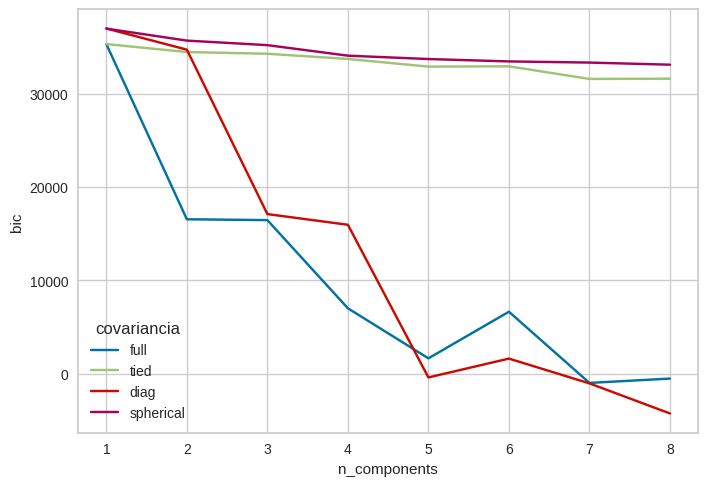

In [29]:
# Plotando gráfico de linha para visualizar as variancias, seus componentes e o bic
sns.lineplot(data=resultado, x='n_components', y='bic', hue='covariancia');

In [30]:
# Iniciando o modelo com 5 clusters, com a covariancia do tipo diag, fazendo combinações e com semente para reprodutibilidade
model_gaussian = GaussianMixture(n_components=5, covariance_type='diag', n_init=10, random_state=42)

# Aplicando o modelo
model_gaussian_labels = model_gaussian.fit_predict(df_rfm_scaled)

# Plotando o gráfico para a visualização dos clusters
px.scatter_3d(df_rfm, x='R', y='F', z='M', color=model_gaussian_labels.astype(str), template='plotly_dark')

### **MeanShift**

In [51]:
# Copia o dataframe
X = df_rfm_scaled.copy()


# Calcula o largura de banda ideal, utilizando a largura do vizinho mais próximo em 8%, utilizando todos os dados disponíveis
bandwidth = estimate_bandwidth(X, quantile=0.08, n_samples=None, random_state=42)
print(f"Bandwidth estimado: {bandwidth}")

# Iniciando e aplicando o modelo com o bandwidth estimado
meanshift = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift.fit_predict(X)

# Plotando o gráfico para a visualização dos clusters
px.scatter_3d(df_rfm, x='R', y='F', z='M', color=meanshift_labels.astype(str), template='plotly_dark')


Bandwidth estimado: 1.0039411633994302


## **Interpretando os resultados**

Kmeans e Clusterização Hierarquica foram os melhores modelos. Escolhido com 5 cluster, pois retrata bem a segmentação de clientes sem deixar genérico demais e nem diluído demais. Kmeans foi o modelo escolhido devido ao resultado superior nas métricas(silhouette_score, davies_bouldin_score, calinski_harabasz_score) com 5 clusters.

image.png
**Kmeas**
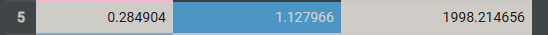
**Clusterização Hierarquica**
image.png

In [38]:
# Calculando os centroids no modelo kmeans
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_scaled.columns)
centers

,R,F,M
0,-0.332062,-0.587727,0.253743
1,-0.744213,1.088938,0.605886
2,1.156683,-0.715316,0.483608
3,0.618223,-0.736762,-1.397744
4,-0.805296,0.787311,-1.172028


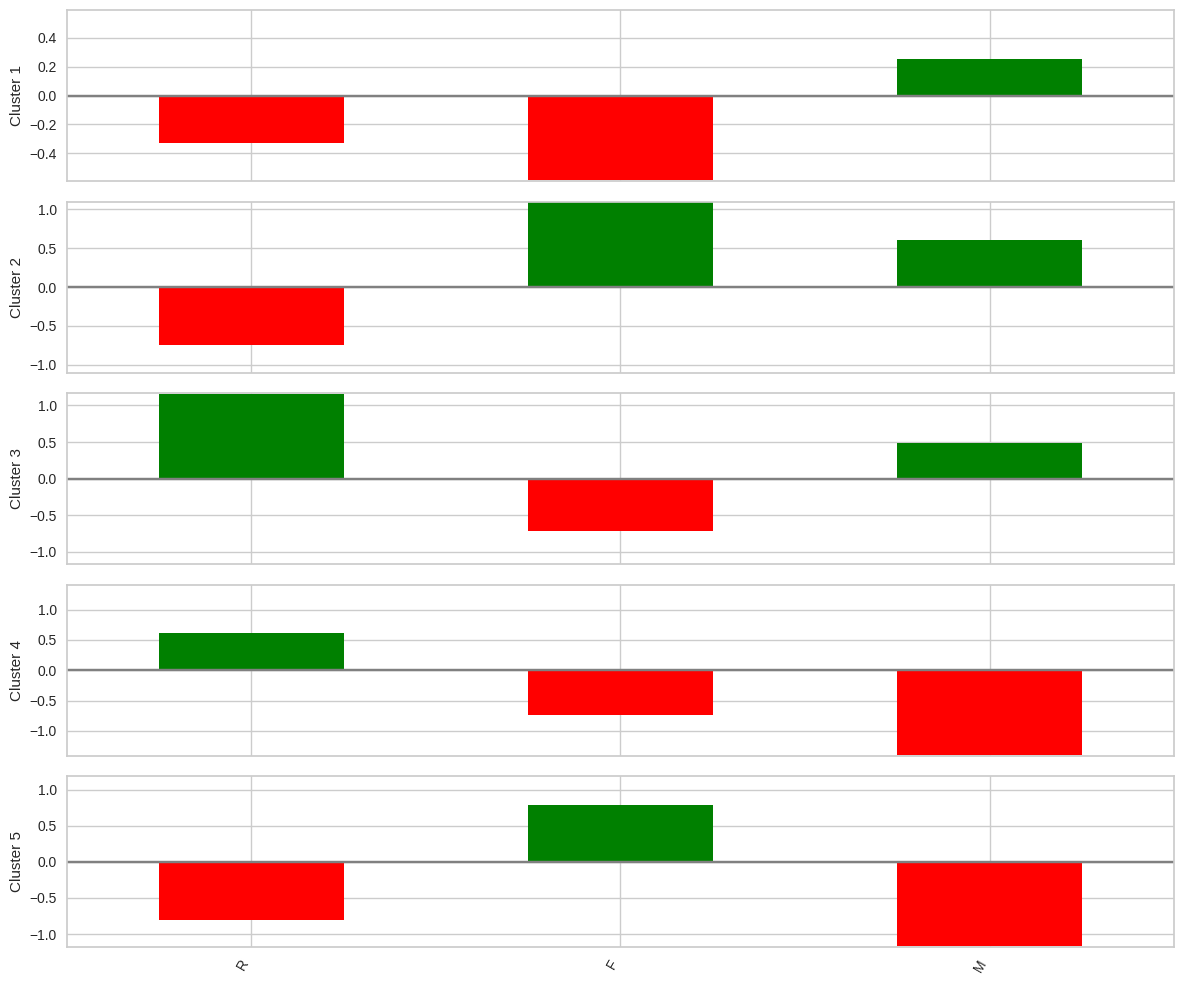

In [39]:
# Plotando o gráfico para vizualização dos clusters
fig,axes = plt.subplots(nrows=5, figsize=(12,10), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

### **Clusters:**
### **Com os cluters abaixo a equipe de Marketing poderá traçar as melhores estratégicas para cada cluster, como por exemplo:**

*   **Cluster 1 - Compradores Ocasionais:**

                Clientes que compraram já a algum tempo, tem baixa frequência mas possuem um gasto médio relativamente alto.
                Estratégia: Campanhas com ofertas personalizadas baseadas em compras anteriores e cupom de desconto com validade para alguns dias.


*   **Cluster 2 - Clientes Leais com potencial:**
                Clientes que compraram a bastante tempo, porém tem altíssima frequência quando compram, e tem um gasto médio alto.
                Estratégia: Programa de fidelidade com recompensas para alta frequência, recomendações com base no histórico.

*   **Cluster 3 - Clientes Novos com potencial:**
                Clientes que compraram bem recentemente, porém com baixa frequência e ticket médio alto.
                Estratégia: Ofertas para segunda compra, programa de fidelidade.

*   **Cluster 4 - Clientes Novos com baixo gasto:**
                Clientes que compraram recentemente, mas com baixa frequência e baixíssimo ticket médio.
                Estratégia: Campanhas do tipo "gaste acima de X e ganhe frete grátis", programa de fidelidade que incentive compras recorrentes.

*   **Cluster 5 - Clientes econômicos:**
                Clientes que compraram a bastante tempo, mas com alta frequência e com baixíssimo ticket médio.
                Estratégia: Ofertas de combos de produtos, cashback, promoção para produtos premium.


